In [1]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pyopencl as cl
import time
import nibabel
import trimesh
import Voxelize 
import tempfile
import os 
import pymeshfix

def FixMesh(inmesh):
    with tempfile.TemporaryDirectory() as tmpdirname:
        inmesh.export(tmpdirname+os.sep+'__in.stl')
        pymeshfix.clean_from_file(tmpdirname+os.sep+'__in.stl', tmpdirname+os.sep+'__out.stl')
        fixmesh=trimesh.load_mesh(tmpdirname+os.sep+'__out.stl')
        os.remove(tmpdirname+os.sep+'__in.stl')
        os.remove(tmpdirname+os.sep+'__out.stl')
    return fixmesh

In [2]:
Voxelize.InitOpenCL('gfx1030')

gfx1030
Selecting device:  gfx1030


In [3]:
skull_mesh=trimesh.load_mesh("D:/Shirshak/Research/BabelBrain/Tests/3880/bone.stl")
# skull_mesh = FixMesh(skull_mesh)
# skull_mesh.export("D:/Shirshak/Research/BabelBrain/Tests/3880/bone.stl")

In [4]:
print("Running voxelization using GPU")
Points_gpu=Voxelize.Voxelize(skull_mesh,targetResolution=1333/9/250e3*0.75*1e3,GPUBackend='OpenCL')
print(f"Points.shape: {Points_gpu.shape}")
print(f"Points.size: {Points_gpu.size}")

print("Running voxelization using CPU")
Points_cpu = skull_mesh.voxelized(1333/9/250e3*0.75*1e3,max_iter=30).fill().points.astype(np.float32)
print(f"Points.shape: {Points_cpu.shape}")
print(f"Points.size: {Points_cpu.size}")

Running voxelization using GPU
GPU Voxelizing # triangles 211204
spatial step and  maximal grid dimensions [0.44402951 0.44370195 0.44372752] 420 400 631


c:\Users\Shirshak\miniconda3\envs\bbl_dev\lib\site-packages\pyopencl\__init__.py:270: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


totalPoints 2130785
globalcount [2130785       0]
Points.shape: (2130785, 3)
Points.size: 6392355
Running voxelization using CPU
Points.shape: (2341148, 3)
Points.size: 7023444


Box Bounds:
(-114.46694946289062, 308.98272705078125, -119.50868225097656, 165.75331115722656, -91.49708557128906, 311.06890869140625)


c:\Users\Shirshak\miniconda3\envs\bbl_dev\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (unknown location)

Falling back to a static output.
  warnings.warn(


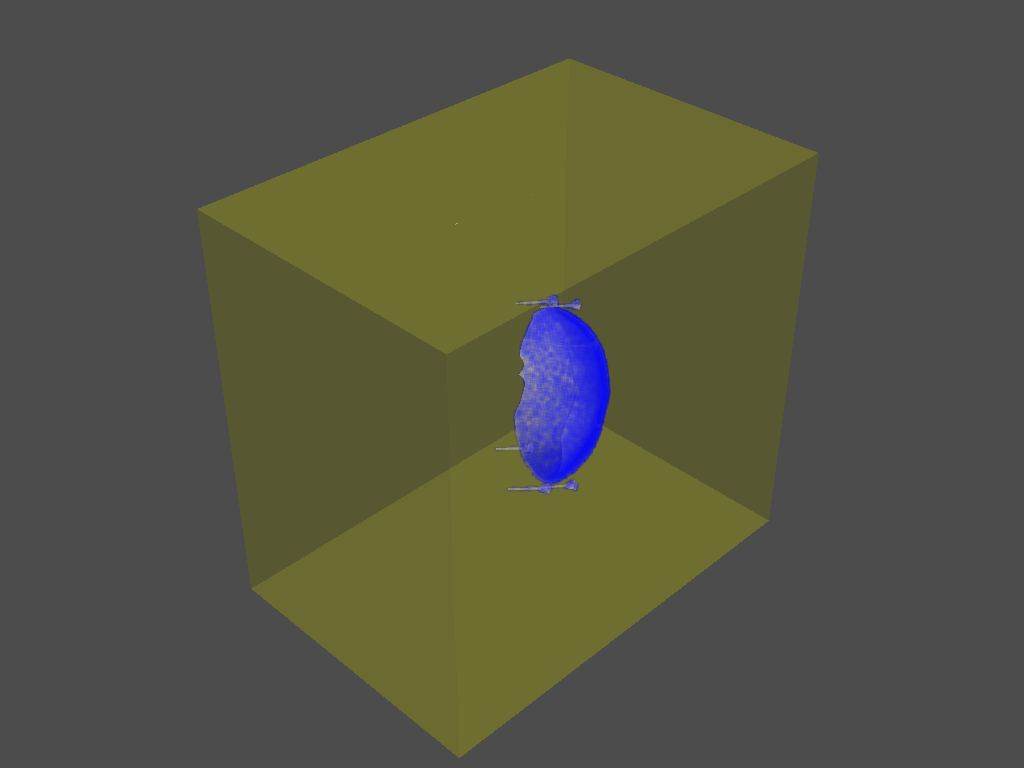

In [12]:
import pyvista

Location =  np.array([19.980962846971867, -28.084638710500766, 33.75616471107763])
SpatialStep = 1333/9/250e3*0.75*1e3
x_vec=np.arange(Points_gpu[:,0].min()-30,Points_gpu[:,0].max()+2*(Location[0]-Points_gpu[:,0].min())+SpatialStep,SpatialStep)
y_vec=np.arange(Points_gpu[:,1].min()-30,Points_gpu[:,1].max()+2*(Location[1]-Points_gpu[:,1].min())+SpatialStep,SpatialStep)
z_vec=np.arange(Points_gpu[:,2].min()-30,Points_gpu[:,2].max()+2*(Location[2]-Points_gpu[:,2].min())+SpatialStep,SpatialStep)
box_gpu = pyvista.Box(bounds=(x_vec[0],x_vec[-1],y_vec[0],y_vec[-1],z_vec[0],z_vec[-1]))
print("Box Bounds:")
print(box_gpu.GetBounds())

mesh =  pyvista.PolyData(Points_gpu[::100,:])
plotter = pyvista.Plotter()
plotter.add_mesh(pyvista.wrap(skull_mesh),opacity=0.5)
plotter.add_mesh(mesh,color='blue',opacity=0.1)
plotter.add_mesh(Location,color='red',opacity=1.0)
plotter.add_mesh(box_gpu,color='yellow',opacity=0.2)
plotter.show()
# totalPoints 1317476837
# globalcount [146083708         0]
# globalcount [301967015         0]
# globalcount [464692437         0]
# globalcount [630837077         0]
# globalcount [795571906         0]
# globalcount [960550756         0]
# globalcount [1112396302          0]
# globalcount [1237188475          0]
# globalcount [1309351386          0]
# globalcount [1317476837          0]
# globalcount [1317476837          0]


Box Bounds:
(-85.31199645996094, 311.9219970703125, -134.63299560546875, 256.3803405761719, -99.08633422851562, 446.55499267578125)


c:\Users\Shirshak\miniconda3\envs\bbl_dev\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (unknown location)

Falling back to a static output.
  warnings.warn(


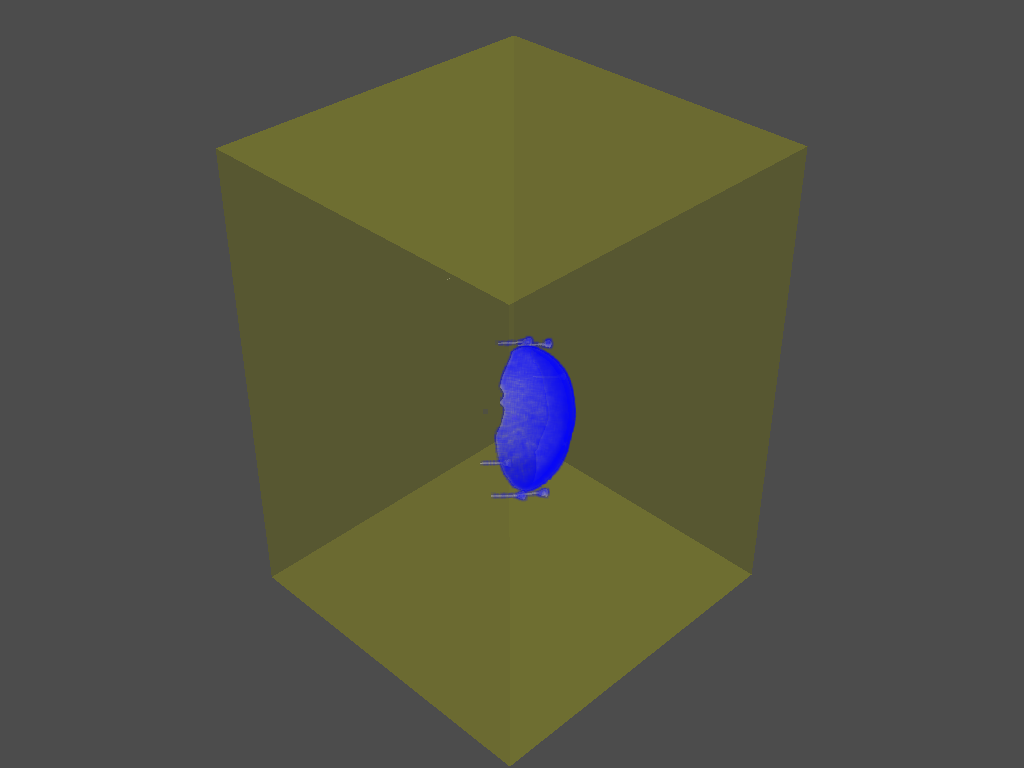

In [13]:
import pyvista

Location =  np.array([19.980962846971867, -28.084638710500766, 33.75616471107763])
SpatialStep = 1333/9/250e3*0.75*1e3
x_vec=np.arange(Points_cpu[:,0].min(),Points_cpu[:,0].max()+2*(Location[0]-Points_cpu[:,0].min())+SpatialStep,SpatialStep)
y_vec=np.arange(Points_cpu[:,1].min(),Points_cpu[:,1].max()+2*(Location[1]-Points_cpu[:,1].min())+SpatialStep,SpatialStep)
z_vec=np.arange(Points_cpu[:,2].min(),Points_cpu[:,2].max()+2*(Location[2]-Points_cpu[:,2].min())+SpatialStep,SpatialStep)
box_cpu = pyvista.Box(bounds=(x_vec[0],x_vec[-1],y_vec[0],y_vec[-1],z_vec[0],z_vec[-1]))
print("Box Bounds:")
print(box_cpu.GetBounds())

mesh =  pyvista.PolyData(Points_cpu[::100,:])
plotter = pyvista.Plotter()
plotter.add_mesh(pyvista.wrap(skull_mesh),opacity=0.5)
plotter.add_mesh(mesh,color='blue',opacity=0.1)
plotter.add_mesh(Location,color='red',opacity=1.0)
plotter.add_mesh(box_cpu,color='yellow',opacity=0.2)


plotter.show()
# totalPoints 1317476837
# globalcount [146083708         0]
# globalcount [301967015         0]
# globalcount [464692437         0]
# globalcount [630837077         0]
# globalcount [795571906         0]
# globalcount [960550756         0]
# globalcount [1112396302          0]
# globalcount [1237188475          0]
# globalcount [1309351386          0]
# globalcount [1317476837          0]
# globalcount [1317476837          0]

# print(f"Differences = {abs(box_cpu.GetBounds() - box_gpu.GetBounds())}")